In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diabetes_data = pd.read_csv('/kaggle/input/pima-indian-diabetes/diabetes.csv')

In [3]:
df = diabetes_data.copy()

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Dataset Information

 1. Pregnancies– Number of times pregnant
 2. Glucose– Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 3. BloodPressure– Diastolic blood pressure (mm Hg)
 4. SkinThickness– Triceps skinfold thickness (mm)
 5. Insulin- 2-Hour serum insulin (mu U/ml)
 6. BMI – Body mass index (weight in kg/ (height in m)^2)
 7. DiabetesPedigreeFunction– Diabetes pedigree function
 8. Age- Age (years)
 9. Outcome– Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All features are numeric data dtypes.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 2. Check Missing & Duplicates

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
import warnings
warnings.filterwarnings("ignore")

## 3. Distribution & Outliers

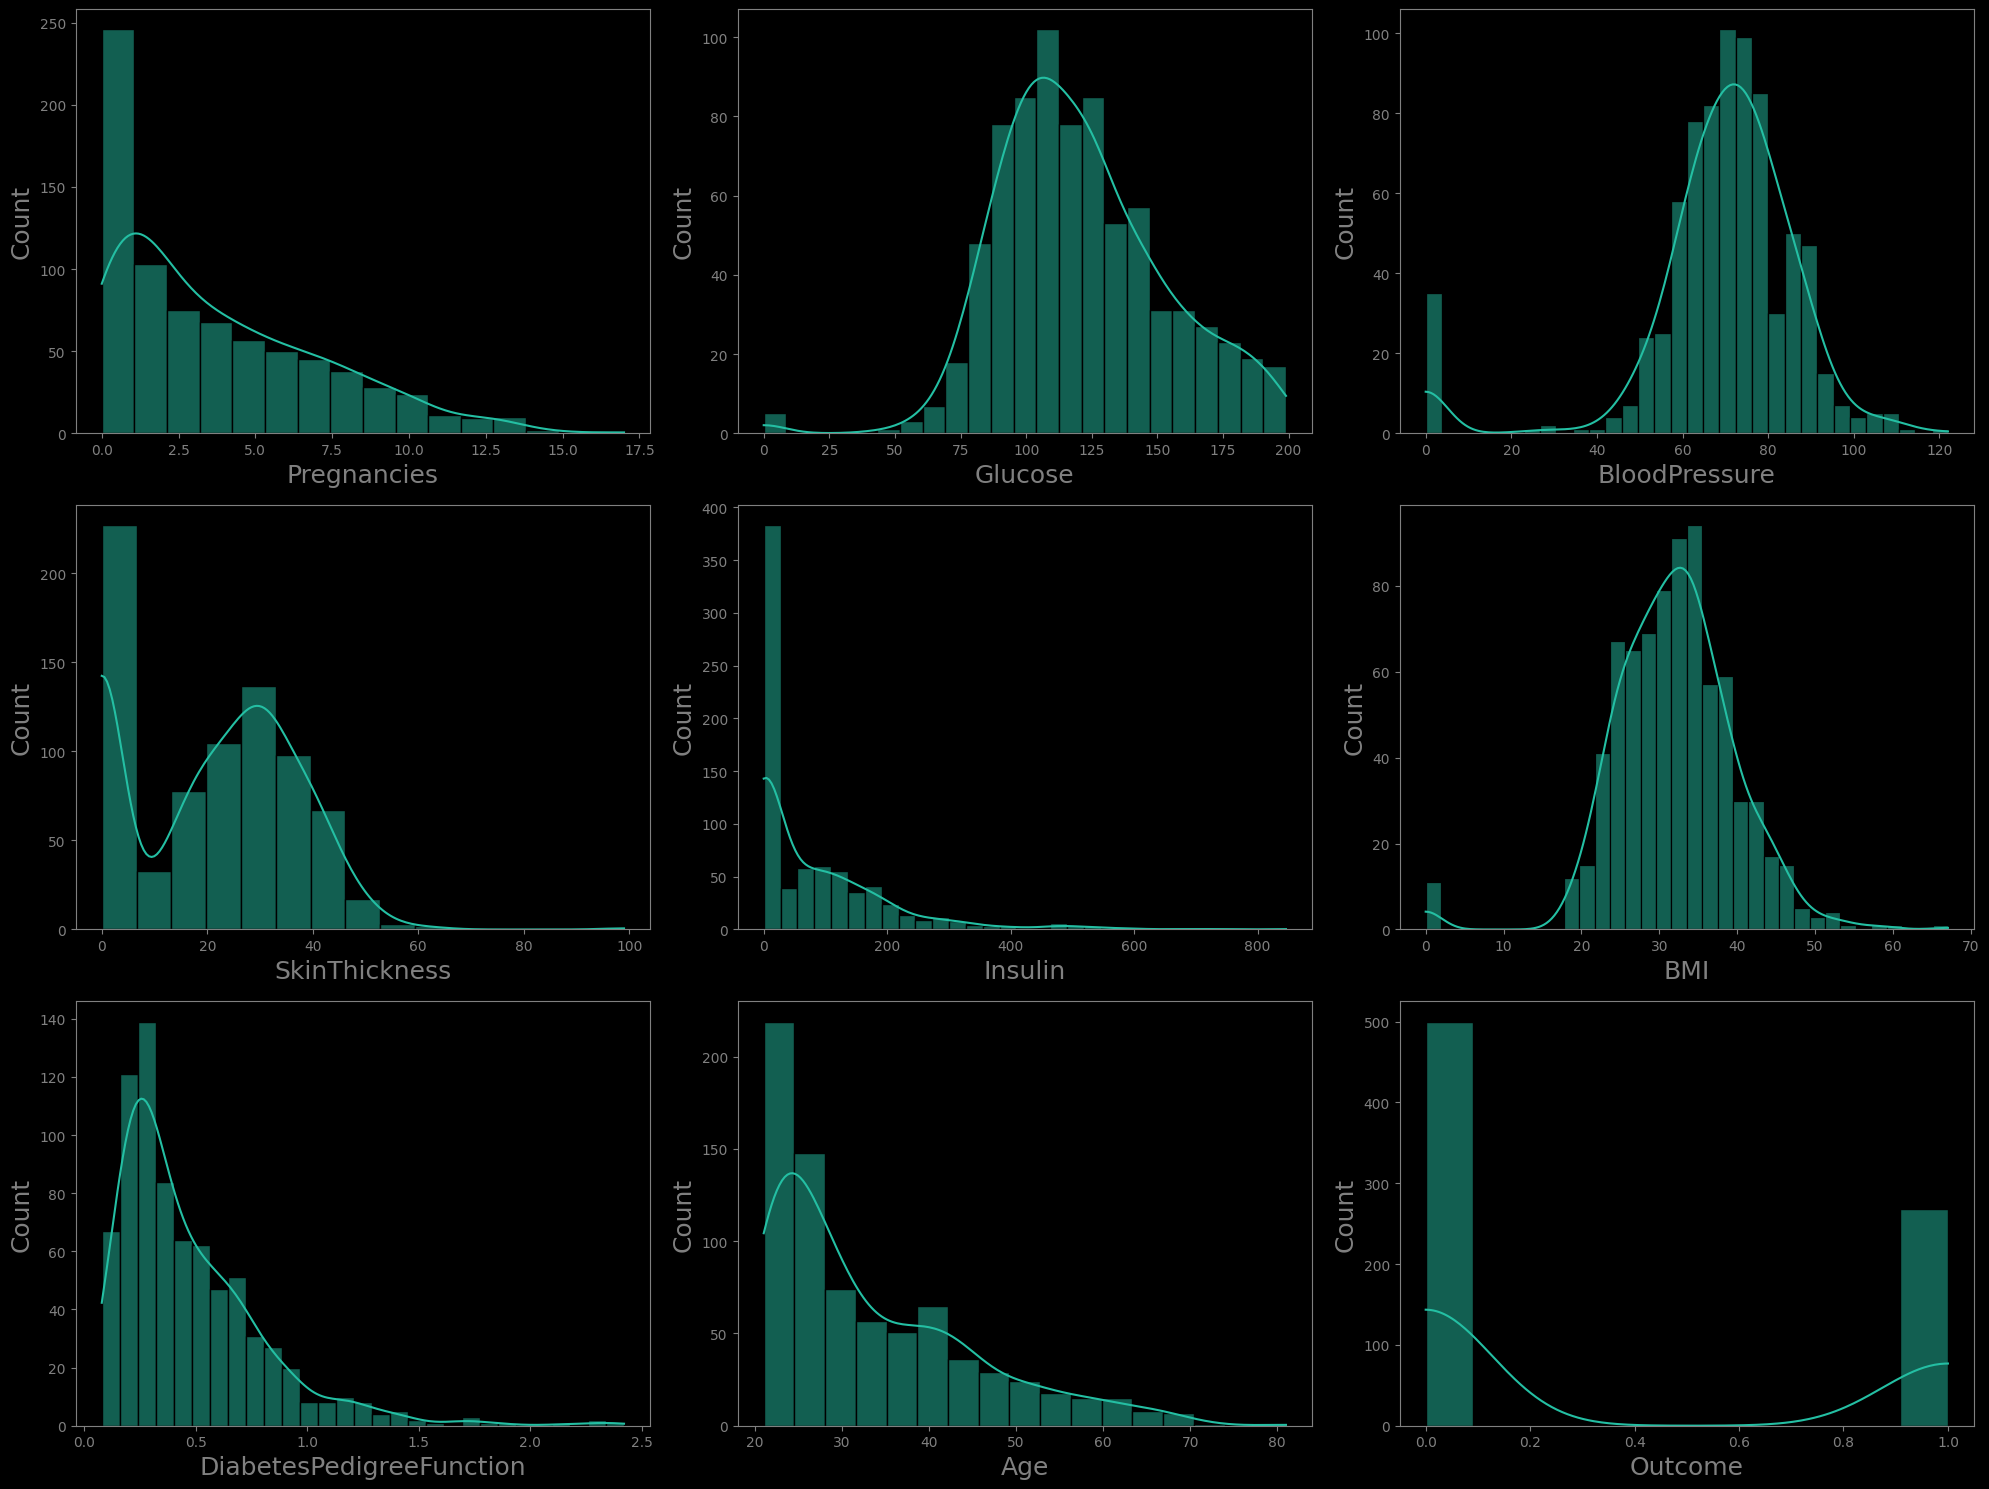

In [10]:

# density plots written by me
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 15), facecolor='black')
axes = axes.flatten()
cols = df.columns.to_list()

for i, col in enumerate(cols):
    sns.histplot(
        data=df,
        x=col,
        ax=axes[i],
        color='#24bfa3',         
        kde=True
    )


    # styling codes - written by ChatGPT
    # Set axes face and spine colors
    axes[i].set_facecolor('black')
    axes[i].spines['bottom'].set_color('grey')
    axes[i].spines['top'].set_color('grey')
    axes[i].spines['left'].set_color('grey')
    axes[i].spines['right'].set_color('grey')
    
    # Set tick color
    axes[i].tick_params(colors='grey', which='both')  # x and y ticks
    
    # Set axis label colors
    axes[i].xaxis.label.set_color('grey')
    axes[i].yaxis.label.set_color('grey')
    axes[i].xaxis.label.set_fontsize(18)  # increase X label size
    axes[i].yaxis.label.set_fontsize(18)  # increase Y label size

plt.tight_layout()
plt.show()

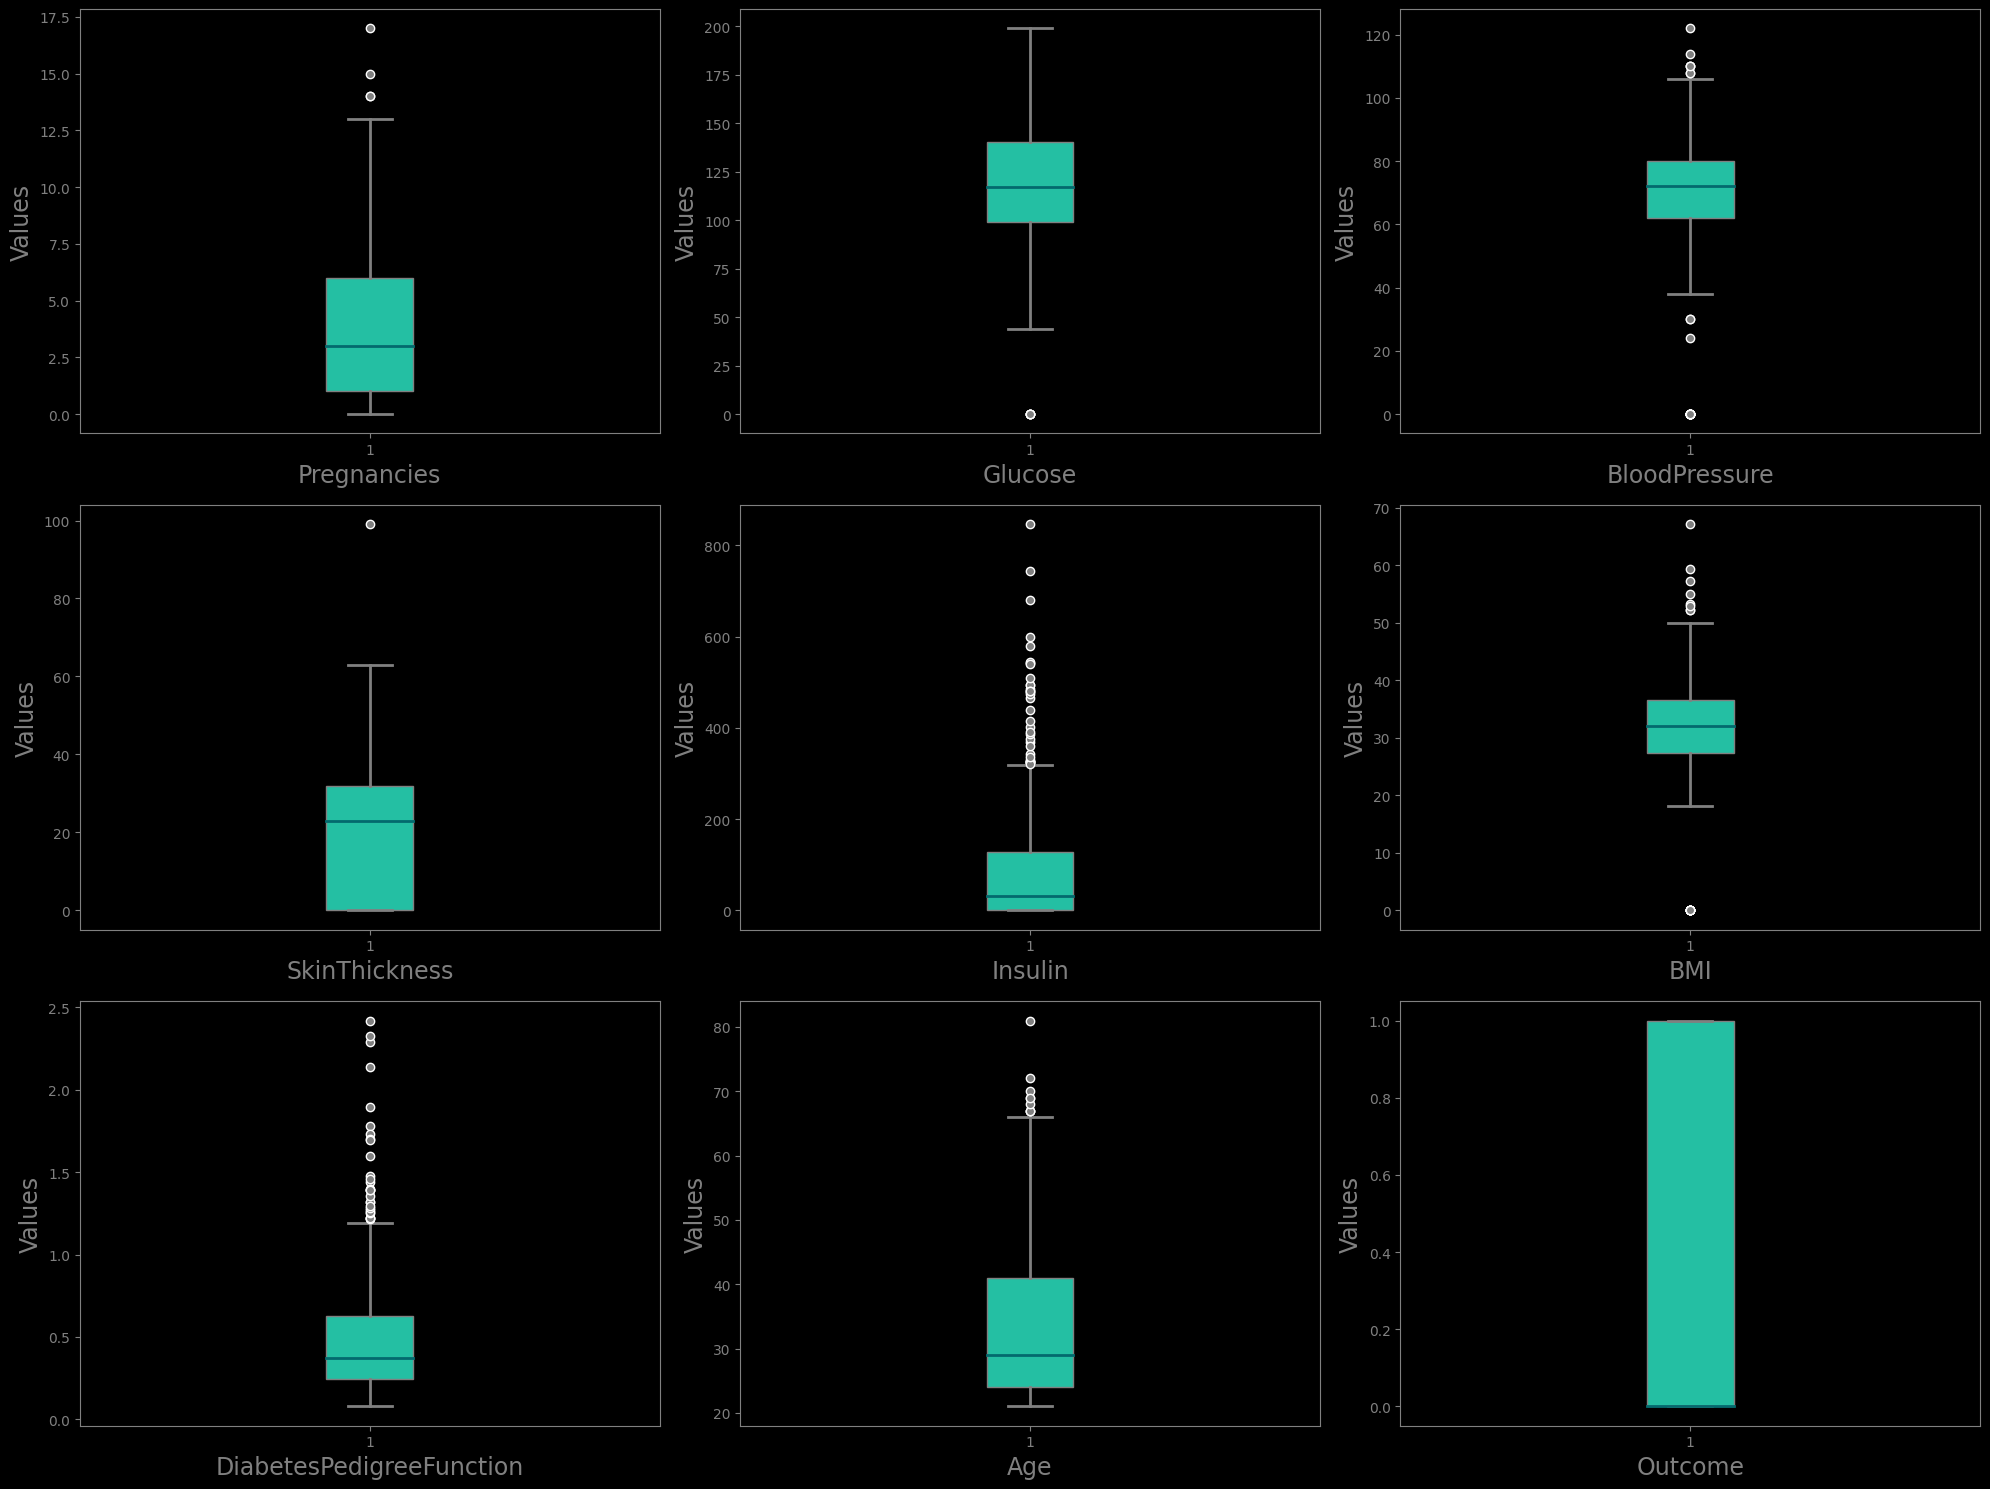

In [11]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15), facecolor = 'black')
axes = axes.flatten()
cols = df.columns.to_list()


for i, col in enumerate(cols):
    axes[i].boxplot(
        x = df[col],
        patch_artist=True,            # allow coloring the box
        boxprops=dict(facecolor='#24bfa3', color='grey'),      # box color and border
        whiskerprops=dict(color='grey', linewidth=2),          # whisker lines
        capprops=dict(color='grey', linewidth=2),              # caps
        medianprops=dict(color='#036a6e', linewidth=2),        # median line
        flierprops=dict(marker='o', markerfacecolor='grey', markeredgecolor='white', markersize=6))

    axes[i].set_xlabel(col, color='grey', fontsize=17)  # show column name as x-label
    axes[i].set_ylabel('Values', color='grey', fontsize=17)

    axes[i].set_facecolor('black')       # axes background
    
    
    axes[i].spines['bottom'].set_color('grey')
    axes[i].spines['top'].set_color('grey')
    axes[i].spines['left'].set_color('grey')
    axes[i].spines['right'].set_color('grey')
    

    
    axes[i].tick_params(colors='grey')   # tick colors
    axes[i].xaxis.label.set_color('grey')
    axes[i].yaxis.label.set_color('grey')
    axes[i].xaxis.label.set_fontsize(17)
    axes[i].yaxis.label.set_fontsize(17)

plt.tight_layout()
plt.show()

In [12]:
def find_borders(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 

    return lower_bound, upper_bound

In [13]:
for col in df.columns.to_list()[:-1]:
    lower_bound, upper_bound = find_borders(col)

    df[col] = np.clip(df[col], a_min = lower_bound, a_max = upper_bound)

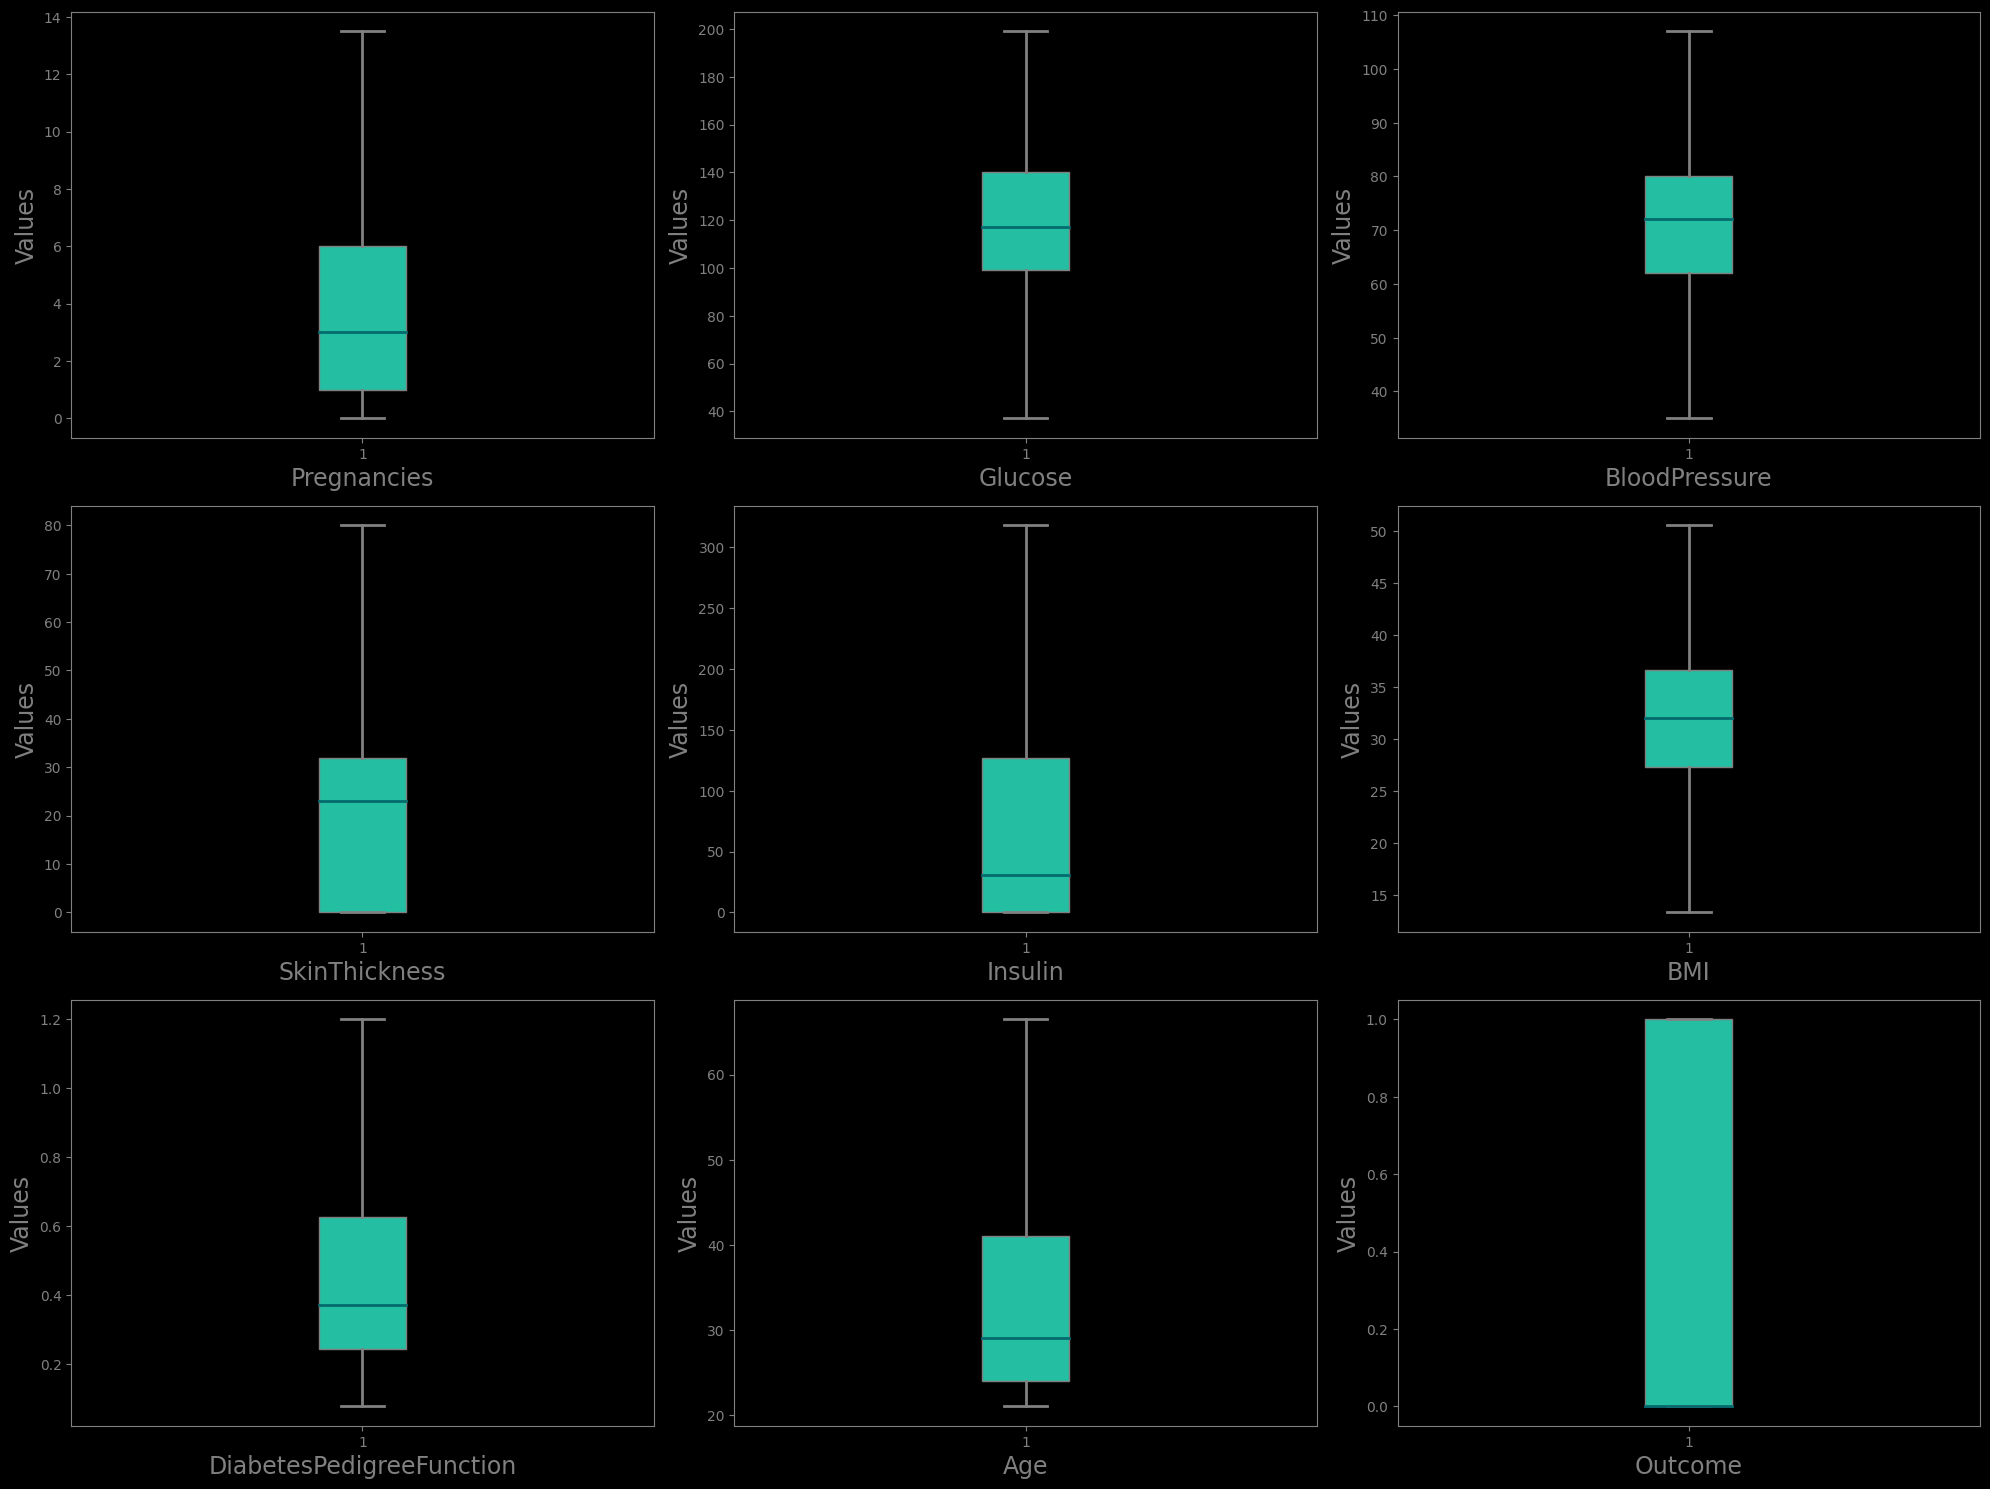

In [14]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15), facecolor = 'black')
axes = axes.flatten()
cols = df.columns.to_list()


for i, col in enumerate(cols):
    axes[i].boxplot(
        x = df[col],
        patch_artist=True,            # allow coloring the box
        boxprops=dict(facecolor='#24bfa3', color='grey'),      # box color and border
        whiskerprops=dict(color='grey', linewidth=2),          # whisker lines
        capprops=dict(color='grey', linewidth=2),              # caps
        medianprops=dict(color='#036a6e', linewidth=2),        # median line
        flierprops=dict(marker='o', markerfacecolor='grey', markeredgecolor='white', markersize=6))

    axes[i].set_xlabel(col, color='grey', fontsize=17)  # show column name as x-label
    axes[i].set_ylabel('Values', color='grey', fontsize=17)

    axes[i].set_facecolor('black')       # axes background
    
    
    axes[i].spines['bottom'].set_color('grey')
    axes[i].spines['top'].set_color('grey')
    axes[i].spines['left'].set_color('grey')
    axes[i].spines['right'].set_color('grey')
    

    
    axes[i].tick_params(colors='grey')   # tick colors
    axes[i].xaxis.label.set_color('grey')
    axes[i].yaxis.label.set_color('grey')
    axes[i].xaxis.label.set_fontsize(17)
    axes[i].yaxis.label.set_fontsize(17)

plt.tight_layout()
plt.show()

# Scaling? 

Scaling is generally not required for XGBoost Algorithm because it is a tree-based algorithm that makes decisions by splitting features at specific threshold values, rather than relying on distances from a mean or origin. This means that features with different ranges, such as one ranging from 0–1 and another from 0–1000, can be split effectively without scaling.

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 4. Split data for modelling

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 5. XGBClassifier with Grid Search  

In [19]:

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [20]:
# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [21]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [22]:
# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [23]:
# Fit the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy')

In [24]:
# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}


In [25]:
# Predict on test set
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:,1]  # probability for ROC AUC


In [26]:
# Evaluate
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.82       100
           1       0.67      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [27]:
# ROC AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", auc)

ROC AUC Score: 0.8205555555555555


In [28]:
# Gini Coefficient
gini = 2 * auc - 1
print("Gini Coefficient:", gini)

Gini Coefficient: 0.641111111111111


In [29]:
# Extract classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Compute ROC AUC and Gini
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1


In [30]:

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    "XGBClassifier + GridSearch": [
        accuracy_score(y_test, y_pred),   # Accuracy
        report['1']['precision'],         # Precision for positive class
        report['1']['recall'],            # Recall for positive class
        report['1']['f1-score'],          # F1-score for positive class
        auc,                               # AUC ROC
        gini                               # Gini
    ]
}, index=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1-score',
    'AUC ROC',
    'Gini Score'
])

In [31]:
metrics_df

,XGBClassifier + GridSearch
Accuracy,0.746753
Precision,0.674419
Recall,0.537037
F1-score,0.597938
AUC ROC,0.820556
Gini Score,0.641111


## 6. XGBClassifier with Randomized Search

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [34]:
# Define hyperparameter distribution for RandomizedSearch
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [35]:
# Randomized Search with 5-fold CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,        # number of random combinations
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


In [36]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [37]:
# Best parameters
print("Best parameters (Randomized Search):", random_search.best_params_)


Best parameters (Randomized Search): {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [38]:
# Predict on test set
y_pred = random_search.predict(X_test)
y_pred_proba = random_search.predict_proba(X_test)[:,1]

In [39]:
# Extract classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Compute ROC AUC and Gini
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1

In [40]:
# Store metrics in DataFrame (add new column)
metrics_df["XGBClassifier + RandomizedSearch"] = [
    accuracy_score(y_test, y_pred),
    report['1']['precision'],
    report['1']['recall'],
    report['1']['f1-score'],
    auc,
    gini
]


In [41]:
metrics_df

,XGBClassifier + GridSearch,XGBClassifier + RandomizedSearch
Accuracy,0.746753,0.746753
Precision,0.674419,0.692308
Recall,0.537037,0.500000
F1-score,0.597938,0.580645
AUC ROC,0.820556,0.818333
Gini Score,0.641111,0.636667


Analysis:

Accuracy: Same for both (0.7468) → Both models classify the same number of correct samples overall.

Precision: RandomizedSearch is slightly higher (0.692 vs 0.674), meaning it makes fewer false positive predictions for the positive class.

Recall: GridSearch is higher (0.537 vs 0.500), meaning it catches more actual positives.

F1-score: GridSearch slightly better (0.598 vs 0.581), as it balances precision and recall.

AUC & Gini: GridSearch slightly better (0.8206 vs 0.8183, 0.6411 vs 0.6367), indicating slightly better overall ranking of positive vs negative samples.

## Comparison

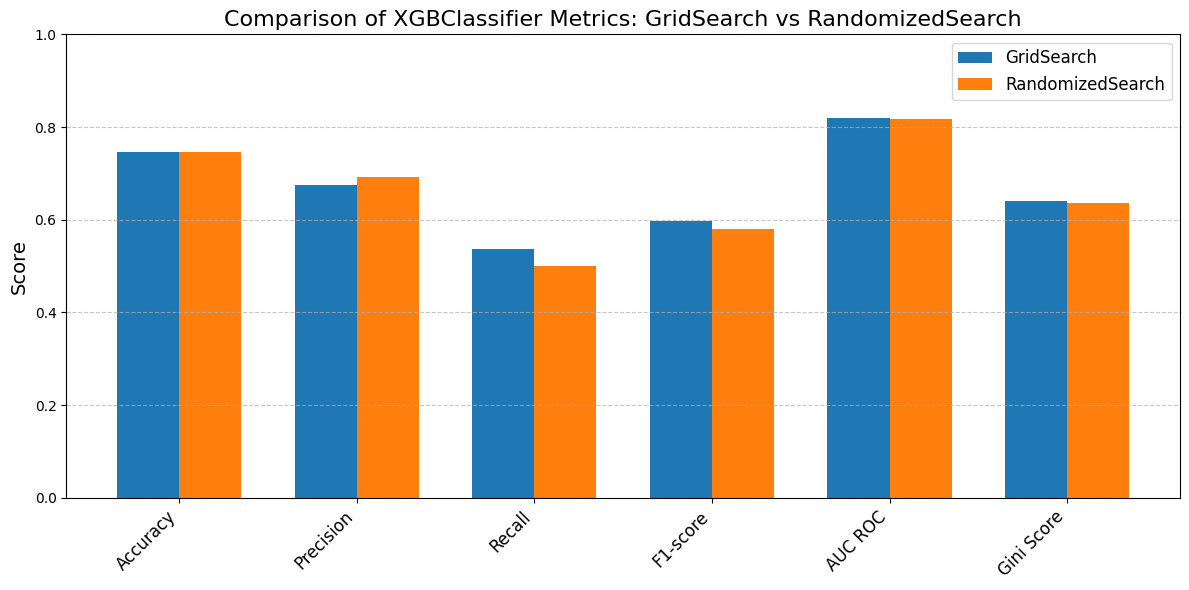

In [42]:
# Metrics DataFrame
metrics = metrics_df.copy()

# Metrics names (indexes)
metrics_names = metrics.index.tolist()

# Bar positions
x = np.arange(len(metrics_names))
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(12,6))

# Bars for GridSearch
ax.bar(x - width/2, metrics["XGBClassifier + GridSearch"], width, label='GridSearch', color='#1f77b4')

# Bars for RandomizedSearch
ax.bar(x + width/2, metrics["XGBClassifier + RandomizedSearch"], width, label='RandomizedSearch', color='#ff7f0e')

# Labels and ticks
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of XGBClassifier Metrics: GridSearch vs RandomizedSearch', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics_names, rotation=45, ha='right', fontsize=12)
ax.set_ylim(0, 1)  # since all metrics are between 0 and 1
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


RandomizedSearchCV is faster and still very close in performance, which makes it a practical choice when computational resources are limited. 